In [1]:
import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
# get all categories 
results = sp.categories(country='CH')['categories']
categories = results['items']
while results['next']:
    results = sp.next(results)['categories']
    categories.extend(results['items'])
print(f"{len(categories)} categories found")

37 categories found


In [3]:
[(ctg['id'], ctg['name']) for ctg in categories]

[('toplists', 'Top Lists'),
 ('at_home', 'At Home'),
 ('hiphop', 'Hip-Hop'),
 ('pop', 'Pop'),
 ('mood', 'Mood'),
 ('french_variety', 'French Pop'),
 ('party', 'Party'),
 ('edm_dance', 'Electronic/Dance'),
 ('rock', 'Rock'),
 ('chill', 'Chill'),
 ('wellness', 'Wellness'),
 ('workout', 'Workout'),
 ('indie_alt', 'Indie'),
 ('decades', 'Decades'),
 ('focus', 'Focus'),
 ('rnb', 'R&B'),
 ('thirdparty', 'Tastemakers'),
 ('sleep', 'Sleep'),
 ('latin', 'Latin'),
 ('jazz', 'Jazz'),
 ('classical', 'Classical'),
 ('audiobooks', 'Audiobooks'),
 ('country', 'Country'),
 ('romance', 'Romance'),
 ('dinner', 'Cooking & Dining'),
 ('family', 'Kids & Family'),
 ('metal', 'Metal'),
 ('roots', 'Folk & Acoustic'),
 ('popculture', 'Trending'),
 ('gaming', 'Gaming'),
 ('travel', 'Travel'),
 ('soul', 'Soul'),
 ('punk', 'Punk'),
 ('reggae', 'Reggae'),
 ('blues', 'Blues'),
 ('funk', 'Funk'),
 ('arab', 'Arab')]

In [4]:
selected_category_ids = [
#     'edm_dance',
#     'rock',
#     'chill',
#     'roots',
    'soul',
#     'rnb',
    'reggae',
    'blues',
    'funk',
]

In [5]:
playlists = []
for cat_id in selected_category_ids:
    results = sp.category_playlists(cat_id)['playlists']
    newpls = [{'category': cat_id, 'name': pl['name'], 'id': pl['id']} for pl in results['items']]
    playlists.extend(newpls)
    print(f"added {len(newpls)} playlists for category {cat_id}")
    while results['next']:
        results = sp.next(results)['playlists']
        newpls = [{'category': cat_id, 'name': pl['name'], 'id': pl['id']} for pl in results['items']]
        playlists.extend(newpls)
        print(f"added {len(newpls)} playlists for category {cat_id}")
len(playlists)

added 20 playlists for category soul
added 5 playlists for category soul
added 14 playlists for category reggae
added 20 playlists for category blues
added 13 playlists for category funk


72

In [6]:
playlists[1]

{'category': 'soul', 'name': 'Sound Of Motown', 'id': '37i9dQZF1DWYC7CaxNgoCg'}

In [7]:
tracks = []
for playlist in playlists:
    results = sp.playlist(playlist['id'])['tracks']
    for item in results['items']:
        if item['track']:
            tracks.append({
                'id': item['track']['id'],
                'name': item['track']['name'],
                'artists': [{'id': artist['id'], 'name': artist['name']} for artist in item['track']['artists']],
                'playlist': playlist
            })
    while results['next']:
        results = sp.next(results)
        for item in results['items']:
            if item['track']:
                tracks.append({
                    'id': item['track']['id'],
                    'name': item['track']['name'],
                    'artists': [{'id': artist['id'], 'name': artist['name']} for artist in item['track']['artists']],
                    'playlist': playlist
                })
len(tracks)

5411

In [8]:
tracks[0]

{'id': '37j56IWzpplKE5zrlQRmxc',
 'name': 'I Heard It Through The Grapevine',
 'artists': [{'id': '3koiLjNrgRTNbOwViDipeA', 'name': 'Marvin Gaye'}],
 'playlist': {'category': 'soul',
  'name': 'Motown Soul Number Ones',
  'id': '37i9dQZF1DX8xV1CEmgc1h'}}

In [9]:
# dedupe tracks
unique_tracks = []
track_ids = set()
for index, track in enumerate(tracks):
    if track['id'] not in track_ids:
        unique_tracks.append(track)
        track_ids.add(track['id'])
len(unique_tracks)

4751

In [11]:
import pandas as pd
# pd.set_option('display.max_rows', 10)
df_audio_features = pd.DataFrame(spotify.get_audio_features_for_tracks(sp, list(track_ids))).drop(
    ['track_href', 'analysis_url', 'type', 'uri', 'loudness'], axis=1)
df_audio_features

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.498,0.634,8,1,0.2140,0.5110,0.002150,0.0850,0.252,130.865,13vTvs5XNIsG2jbP0MZEv6,177772,4
1,0.573,0.427,8,0,0.0397,0.5070,0.023600,0.1840,0.239,143.956,0awxfMcESmYucafK7d6CjL,178040,4
2,0.719,0.547,10,1,0.0362,0.0679,0.000003,0.2290,0.554,121.724,1ip1ULxxvAzaqH3VqKObdu,316000,4
3,0.419,0.200,4,0,0.1060,0.8680,0.827000,0.1450,0.480,88.730,6cqW0uVvurfrB83AlPGQA8,184189,4
4,0.719,0.645,0,1,0.0387,0.2510,0.000004,0.2730,0.961,113.965,0qOkHfSClduvkvGk6fCu8l,281200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,0.786,0.598,7,1,0.1910,0.3290,0.000026,0.0612,0.882,147.225,6jNKJ3tW2MOApL3cYMSj4L,154253,4
4747,0.652,0.328,11,0,0.0538,0.3270,0.000000,0.1100,0.177,83.225,72mNADtQDzlS3svnwuTRqh,209649,4
4748,0.257,0.669,7,1,0.1030,0.1970,0.049100,0.6160,0.393,183.927,0QpLq6RybVWoVvhmC1PCeW,497133,3
4749,0.787,0.815,2,1,0.0512,0.1580,0.000000,0.3930,0.959,119.878,4y9iH8fG2E3sdM4ccUEmHx,209173,4


In [12]:
# save tracks
import json
import os
folder = 'data'
filename = 'spotify_workout_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    df_audio_features.to_json(path_or_buf=f, orient='records', indent=4)

##### read the file

In [13]:
import json
import os
folder = 'data'
filename = 'spotify_workout_tracks.json'
with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
    tracks = json.load(f)
len(tracks)

4751

##### select the suitable tracks:

In [14]:
tempo_min, tempo_max = 125, 130
track_ids = list(df_audio_features[
    (df_audio_features['tempo'] >= tempo_min) & 
    (df_audio_features['tempo'] <= tempo_max) & 
    (df_audio_features['danceability'] >= 0.8) &
    (df_audio_features['liveness'] <= 0.4) &
    (df_audio_features['speechiness'] <= 0.33)
]['id'])
len(track_ids)

54

In [15]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test BPM {tempo_min} - {tempo_max} (Spotify Categories)", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 6xhP8EcsyzlLdWz9tJ8EZo


In [16]:
# add tracks to playlist
spotify.add_tracks(sp, playlist_id, track_ids, skip_duplicates=True)

Playlist has 0 existing tracks
Skipping duplicates: True
54 tracks to be added
54 tracks added
OK


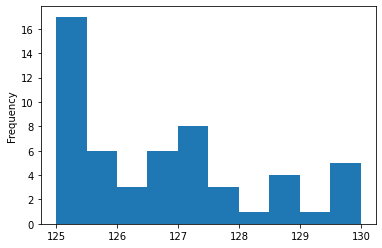

In [17]:
max_ids = 50
tracks_audio_features = []
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_audio_features['tempo'].plot.hist()